In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train,y_Train),(x_Test,y_Test)= mnist.load_data()

###將features(數字特徵值)轉為四維矩陣

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32') 

 ###將features標準化

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

##label 以Onehot encoding轉換

In [19]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [6]:
model=Sequential() ##建立model 序列化物件

In [7]:
##建立卷積層
model.add(Conv2D(filters=16, ##建立16個濾鏡 filter weight 
                 kernel_size=(5,5), ##每一個濾鏡大小 5*5
                 padding = 'same', ##產生的padding(卷積) 不變
                 input_shape = (28,28,1),##第1,2維度輸入影像大小28*28 第三維度因為是單色灰階影像所以是1
                 activation = 'relu'))##激活函數為relu

##建立池化層1

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
##建立卷積層2
model.add(Conv2D(filters=36,##建立36個濾鏡 filter weight
                kernel_size = (5,5),
                 padding = 'same',
                 activation = 'relu'))

In [10]:
##建立池化層2
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
#建立Dropout(0.25)每次迭代訓練 會隨機放棄25%的神經元
model.add(Dropout(0.25))

In [12]:
##建立平坦層
model.add(Flatten())

In [13]:
#建立隱藏層
model.add(Dense(128,activation = 'relu'))##建立128神經元

In [14]:
##每次迭代訓練時隨機放棄50%神經元
model.add(Dropout(0.5))

In [15]:
##建立輸出層
model.add(Dense(10,activation = 'softmax'))##建立10個神經元對應0～9十個數字 並且使用software函數進行轉換 soft可以將神經元輸出
                                           ##轉換成為預測每個數字的機率

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [18]:
##進行訓練
model.compile(loss='categorical_crossentropy',#設定損失函數(Loss Function)在深度學習是用cross_entropy交叉熵
              optimizer = 'adam', ##訓練時優化方法用adam方法 提高收斂 準確率
              metrics=['accuracy']) ##評估模型方式 accuracy準確率

In [21]:
##開始訓練
train_history = model.fit(x = x_Train4D_normalize , 
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)##顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
30s - loss: 0.4874 - acc: 0.8481 - val_loss: 0.0971 - val_acc: 0.9723
Epoch 2/10
30s - loss: 0.1412 - acc: 0.9588 - val_loss: 0.0637 - val_acc: 0.9812
Epoch 3/10
31s - loss: 0.1033 - acc: 0.9689 - val_loss: 0.0512 - val_acc: 0.9843
Epoch 4/10
32s - loss: 0.0847 - acc: 0.9753 - val_loss: 0.0459 - val_acc: 0.9863
Epoch 5/10
30s - loss: 0.0718 - acc: 0.9783 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 6/10
30s - loss: 0.0648 - acc: 0.9807 - val_loss: 0.0396 - val_acc: 0.9885
Epoch 7/10
30s - loss: 0.0573 - acc: 0.9829 - val_loss: 0.0416 - val_acc: 0.9881
Epoch 8/10
31s - loss: 0.0510 - acc: 0.9846 - val_loss: 0.0333 - val_acc: 0.9903
Epoch 9/10
30s - loss: 0.0452 - acc: 0.9862 - val_loss: 0.0336 - val_acc: 0.9902
Epoch 10/10
31s - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0335 - val_acc: 0.9900


In [22]:
##建立show_train_history過程圖形
import matplotlib.pyplot as plt
def show_train_history(trian_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train_History')
    plt.ylabel(train)
    plt.legend(['train'],['validation'],loc='upper left')#設定legend圖例train validation(驗證) loc位置在左上方
    plt.show()

/home/minglu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


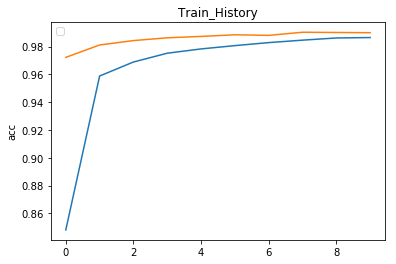

In [23]:
##畫出準確率模型
show_train_history(train_history,'acc','val_acc')

/home/minglu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


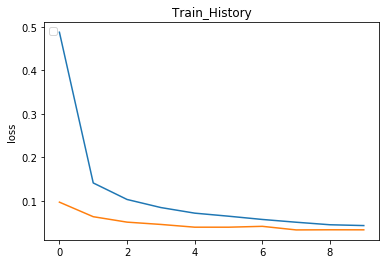

In [24]:
##畫出誤差率
show_train_history(train_history,'loss','val_loss')

In [25]:
##評估模型準確率
scores = model.evaluate(x_Test4D,y_TestOneHot)
scores[1]

 9824/10000 [============================>.] - ETA: 0s

0.99160000000000004

In [32]:
prediction = model.predict_classes(x_Test4D_normalize)
prediction[:10]

 9824/10000 [============================>.] - ETA: 0s

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [33]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,predication,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(1,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title = "label="+str(labels[idx])
        if len(predication)>0:   #如果有傳入預測結果
            title+=',predict='+str(predication[idx])#標題title加入預測結果
        ax.set_title(title,fontsize=10)#設定子圖形的標題title and 大小
        ax.set_xticks([]);ax.set_yticks([])#設定不顯示刻度
        idx+=1
        plt.show()

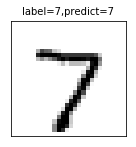

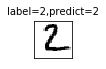

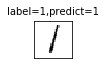

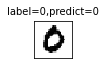

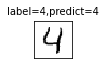

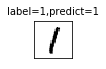

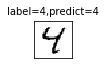

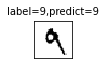

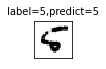

In [34]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [35]:
#用pandas建立混淆矩陣(cofusion matrix)
import pandas as pd
pd.crosstab(y_Test,
            prediction,
            rownames=['label'],
            colnames=['prdection'])

prdection,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,2,0,1027,0,1,0,0,2,0,0
3,0,0,0,1004,0,2,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,5,0,883,2,0,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,1,4,3,0,0,0,1016,1,3
8,4,0,3,2,0,1,0,2,959,3
